In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [36]:
Train_Dir = 'input/training/training.csv'
Test_Dir = 'input/test/test.csv'
lookid_dir = 'input/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
os.listdir('input')

['IdLookupTable.csv', 'SampleSubmission.csv', 'test', 'training']

In [37]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [38]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [39]:
train_data.fillna(method = 'ffill',inplace = True)

In [40]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [41]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [42]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

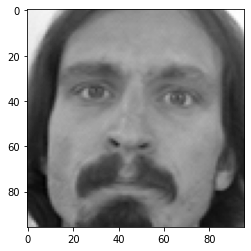

In [43]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [44]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [45]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

In [46]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [47]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)       

In [48]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [49]:
model.fit(X_train,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 309s 13s/step - loss: 874.9631 - mae: 21.5618 - val_loss: 599.7701 - val_mae: 22.5707
Epoch 2/50
23/23 [==============================] - 321s 14s/step - loss: 34.6757 - mae: 4.6084 - val_loss: 179.9546 - val_mae: 12.2651
Epoch 3/50
23/23 [==============================] - 322s 14s/step - loss: 26.7264 - mae: 3.9701 - val_loss: 100.5343 - val_mae: 9.0834
Epoch 4/50
23/23 [==============================] - 303s 13s/step - loss: 24.5354 - mae: 3.7957 - val_loss: 47.1327 - val_mae: 6.1539
Epoch 5/50
23/23 [==============================] - 267s 12s/step - loss: 23.1448 - mae: 3.6927 - val_loss: 34.5101 - val_mae: 5.1041
Epoch 6/50
23/23 [==============================] - 268s 12s/step - loss: 21.3168 - mae: 3.5341 - val_loss: 39.1195 - val_mae: 5.5571
Epoch 7/50
23/23 [==============================] - 262s 11s/step - loss: 19.5965 - mae: 3.3520 - val_loss: 35.4854 - val_mae: 5.2593
Epoch 8/50
23/23 [==============================] - 265

In [50]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [51]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 


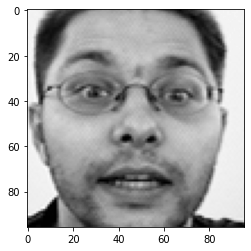

In [52]:
plt.imshow(X_test[0].reshape(96,96),cmap = 'gray')
plt.show()

In [53]:
pred = model.predict(X_test)

In [54]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

# %% [code]
rowid = lookid_data['RowId']
rowid=list(rowid)

# %% [code]
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

# %% [code]
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

# %% [code]
rowid = pd.Series(rowid,name = 'RowId')

# %% [code]
loc = pd.Series(preded,name = 'Location')

# %% [code]
submission = pd.concat([rowid,loc],axis = 1)


# %% [code]
submission.to_csv('face_key_detection_submission.csv',index = False)